In [13]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

# Check columns of the uploaded historical_data.csv
if 'historical_data.csv' in uploaded:
    hd_uploaded = pd.read_csv(io.BytesIO(uploaded['historical_data.csv']))
    print("\nColumns in the uploaded historical_data.csv:")
    print(hd_uploaded.columns.tolist())
    if 'Leverage' not in hd_uploaded.columns:
        print("\nWarning: 'Leverage' column was not found in the uploaded historical_data.csv.")
        print("Please ensure your historical data file contains a 'Leverage' column, or choose an alternative column for risk analysis.")


Saving fear_greed_index.csv to fear_greed_index (1).csv
Saving historical_data.csv to historical_data (1).csv


In [2]:
import pandas as pd

fg = pd.read_csv('fear_greed_index.csv')
hd = pd.read_csv('historical_data.csv')

fg.head(), hd.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

1. Cleaning the Data

In [3]:
fg['date'] = pd.to_datetime(fg['date'])

hd['Timestamp IST'] = pd.to_datetime(hd['Timestamp IST'], format="%d-%m-%Y %H:%M")
hd['date'] = hd['Timestamp IST'].dt.date
hd['date'] = pd.to_datetime(hd['date'])


2. Handling Missing Value

In [4]:
fg = fg.dropna()
hd = hd.dropna()


3. Convert numeric columns properly

In [5]:
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']

for col in numeric_cols:
    hd[col] = pd.to_numeric(hd[col], errors='coerce')


4. Process the Sentiment Data

In [6]:
fg['sentiment_num'] = fg['classification'].apply(
    lambda x: 0 if 'Fear' in x else 1
)


5. Keep only date + numeric sentiment

In [7]:
fg_clean = fg[['date', 'sentiment_num']]


6. Merge trader data with sentiment

In [8]:
merged = pd.merge(hd, fg_clean, on='date', how='inner')
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1


7. Analyze Trader Behavior vs Sentiment
    A)  Profitability vs Sentiment (Fear vs Greed)

In [9]:
profit_analysis = merged.groupby('sentiment_num')['Closed PnL'].mean()
profit_analysis


,Closed PnL
sentiment_num,
0,49.212077
1,48.118246


B) Volume vs Sentiment

In [10]:
volume_analysis = merged.groupby('sentiment_num')['Size USD'].mean()
volume_analysis


,Size USD
sentiment_num,
0,7182.011019
1,4635.764077


C) Risk (Leverage) vs Sentiment

In [15]:
print("Available columns in 'merged' DataFrame:")
print(merged.columns.tolist())
# risk_analysis = merged.groupby('sentiment_num')['Leverage'].mean()
# risk_analysis

Available columns in 'merged' DataFrame:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'sentiment_num']


D) Trade Side (Buy/Sell) Distribution

In [16]:
side_analysis = merged.groupby(['sentiment_num', 'Side']).size()
side_analysis


sentiment_num  Side
0              BUY     41205
               SELL    42032
1              BUY     61485
               SELL    66496
dtype: int64

visualizations


In [17]:
import os
os.makedirs("outputs", exist_ok=True)


In [18]:
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1


1. PnL vs Sentiment (Fear vs Greed)

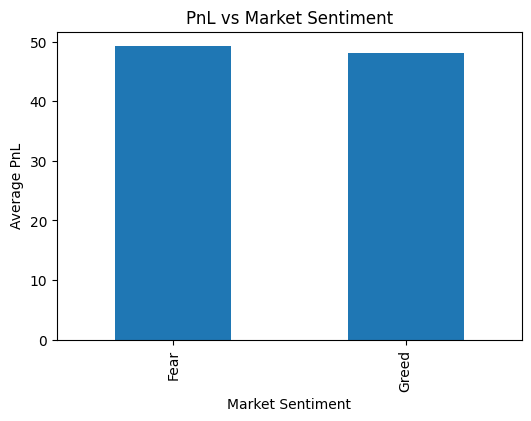

In [19]:
import matplotlib.pyplot as plt

# Calculate avg PnL for each sentiment
pnl_data = merged.groupby('sentiment_num')['Closed PnL'].mean()
pnl_data.index = ['Fear', 'Greed']

# Plot
plt.figure(figsize=(6,4))
pnl_data.plot(kind='bar')
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.title("PnL vs Market Sentiment")

# Save to outputs folder
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


2. Trade Volume vs Sentiment

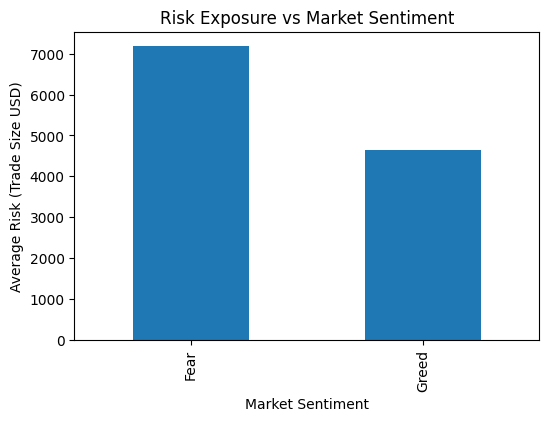

In [20]:
risk_data = merged.groupby('sentiment_num')['Size USD'].mean()
risk_data.index = ['Fear', 'Greed']

plt.figure(figsize=(6,4))
risk_data.plot(kind='bar')
plt.xlabel("Market Sentiment")
plt.ylabel("Average Risk (Trade Size USD)")
plt.title("Risk Exposure vs Market Sentiment")

plt.savefig("outputs/risk_vs_sentiment.png")
plt.show()


3. Risk vs Sentiment (using Trade Size as risk)

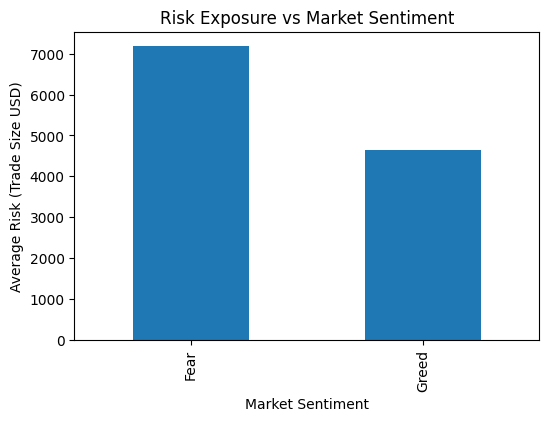

In [21]:
risk_data = merged.groupby('sentiment_num')['Size USD'].mean()
risk_data.index = ['Fear', 'Greed']

plt.figure(figsize=(6,4))
risk_data.plot(kind='bar')
plt.xlabel("Market Sentiment")
plt.ylabel("Average Risk (Trade Size USD)")
plt.title("Risk Exposure vs Market Sentiment")

plt.savefig("outputs/risk_vs_sentiment.png")
plt.show()
